In [46]:
import pandas as pd

df = pd.read_csv("./data/cleaned_merge_df.csv")
df.head()

,date,hour,trip_count,avg_distance,avg_fare,avg_passengers,weather_label,temperature_c,wind_speed_mps,visibility_km
0,2024-01-01,0,5375,2.938327,18.763304,1.609488,"['Fog', 'Mist']",1.5,1.50,1.1750
1,2024-01-01,1,5537,2.864271,18.184262,1.597977,"['Mostly Clear', 'Mist']",1.5,1.25,5.0500
2,2024-01-01,2,5208,3.055340,18.115102,1.548771,['Mist'],1.5,1.00,3.0500
3,2024-01-01,3,3741,3.169671,17.669452,1.529003,"['Partly Cloudy', 'Cloudy']",2.0,1.55,8.9995
4,2024-01-01,4,1998,3.522538,18.636767,1.483984,"['Snow', 'Rain']",2.0,1.55,7.5000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4368 non-null   object 
 1   hour            4368 non-null   int64  
 2   trip_count      4368 non-null   int64  
 3   avg_distance    4368 non-null   float64
 4   avg_fare        4368 non-null   float64
 5   avg_passengers  4368 non-null   float64
 6   weather_label   4368 non-null   object 
 7   temperature_c   4368 non-null   float64
 8   wind_speed_mps  4368 non-null   float64
 9   visibility_km   4368 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 341.4+ KB


# Question 3: Do certain hours of the day see more taxi trips during bad weather?

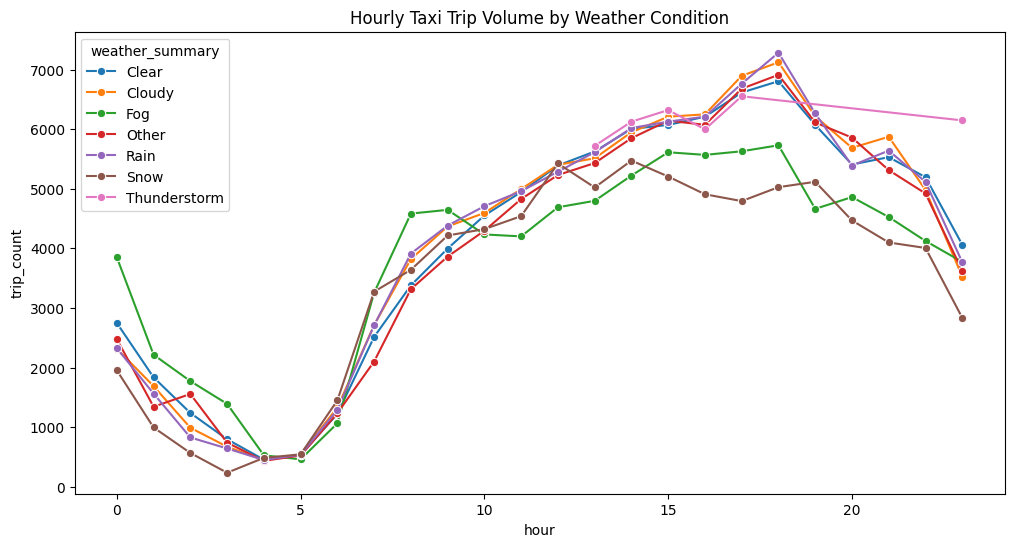

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting relevant columns for Question 3
q3_columns = ['hour', 'trip_count', 'weather_label']
q3_df = df[q3_columns].copy()

# Simplifying weather labels
conditions = [
    'Clear',
    'Cloudy',
    'Rain',
    'Snow',
    'Fog',
    'Thunderstorm',
]
def simplify_weather(weather_label):
    for weather_label in weather_label.split(','):
        for condition in conditions:
            if condition.lower() in weather_label.lower():
                return condition
    return 'Other'  
    
q3_df['weather_summary'] = q3_df['weather_label'].apply(simplify_weather)

# Grouping by hour and weather condition to calculate average trip counts
q3_df = q3_df.groupby(['hour', 'weather_summary']).agg({'trip_count': 'mean'}).reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.title('Hourly Taxi Trip Volume by Weather Condition')
sns.lineplot(data=q3_df, x='hour', y='trip_count', hue='weather_summary', marker='o')
plt.show()


1. 🟠 Cloudy and Clear = Highest Peak Volume
- Around 17:00–18:00, Cloudy and Clear weather show the highest trip counts (~7,200 trips).

- These are ideal weather conditions for daily commuting and evening activities.

2. 🌩️ Thunderstorm Shows Consistently High Usage
- Thunderstorm surprisingly maintains a stable and elevated trip volume across the afternoon and evening (13:00–22:00).

- May suggest passengers shift from walking/public transport to taxis during storms.

3. ❄️ Snow Leads to Lower Trip Volumes
- Snow weather sees consistently lower usage than other weather types, especially during peak hours.

- Likely due to reduced travel willingness or hazardous road conditions.

4. 🌫️ Fog Has Unusual Early Morning Spike
- Fog shows a notably high trip count at 00:00 (midnight), possibly from late-night or early-morning travelers reacting to poor visibility.

- After that, it flattens and trails below most other conditions.

5. 🌧️ Rain Follows Clear/Cloudy Patterns, But Slightly Lower
- Rain exhibits a similar pattern to Clear/Cloudy but with slightly reduced volume.

- Suggests it’s not a major deterrent but may suppress some discretionary trips.

6. ⏰ General Usage Pattern Holds Across All Weather
- Very low usage between 3:00–6:00.

- Gradual rise from 6:00, peaking around 17:00–18:00, then a decline afterward — consistent commuter behavior.

📊 Interpretation for Stakeholders:

- Taxi services should boost driver availability from 11:00 to 19:00, regardless of weather — with extra incentives during storms.

- Urban planners and public transit might use this data to predict modal shifts during bad weather.

- Marketing teams (e.g. Uber, Lyft) could target “clear/cloudy” periods for promotions to meet high demand..



#  Q4. How does visibility affect average taxi distance?
Goal: Determine if low visibility leads to shorter or longer trips.

Columns Needed: visibility_km, avg_distance

Approach: Bin visibility_km (e.g., <2, 2–5, >5 km) and compute average distance.



In [84]:
q4_columns = ['visibility_km', 'avg_distance']
q4_df= df[q4_columns].copy()

q4_df.head()

,visibility_km,avg_distance
0,1.1750,2.938327
1,5.0500,2.864271
2,3.0500,3.055340
3,8.9995,3.169671
4,7.5000,3.522538


In [86]:
import numpy as np

# Define visibility bins and labels
bins = [0, 1, 5, 9.5, 10.1, np.inf]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Extreme/Invalid']

# Create new column for visibility category
q4_df['visibility_level'] = pd.cut(q4_df['visibility_km'], bins=bins, labels=labels, right=True, include_lowest=True)
q4_df.head()

,visibility_km,avg_distance,visibility_level
0,1.1750,2.938327,Low
1,5.0500,2.864271,Moderate
2,3.0500,3.055340,Low
3,8.9995,3.169671,Moderate
4,7.5000,3.522538,Moderate


/var/folders/qq/q7zb_56n3nd0hngl2qjjdt2c0000gn/T/ipykernel_5783/3821590095.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q4_df = q4_df.groupby('visibility_level')['avg_distance'].mean().sort_values(ascending=False).reset_index()


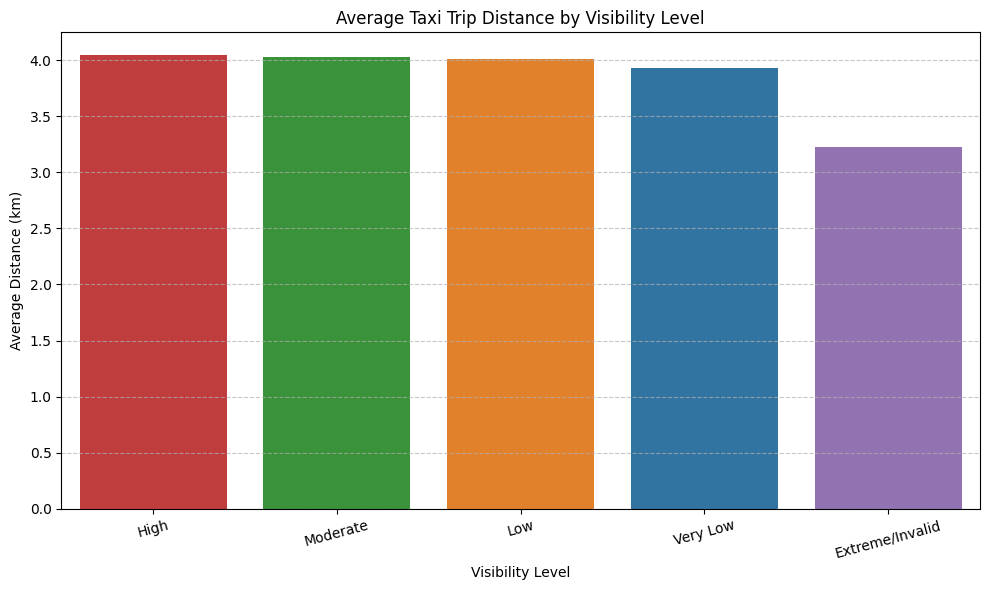

In [93]:
q4_df = q4_df.groupby('visibility_level')['avg_distance'].mean().sort_values(ascending=False).reset_index()

# Set the order for the visibility levels
order = ['High', 'Moderate', 'Low', 'Very Low', 'Extreme/Invalid']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=q4_df, hue='visibility_level', x='visibility_level', y='avg_distance', order=order)

plt.title('Average Taxi Trip Distance by Visibility Level')
plt.xlabel('Visibility Level')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

1. Slight Drop with Poor Visibility:
- As visibility decreases from High to Very Low, the average trip distance gradually declines (from ~4.05 km to ~3.93 km). This could suggest that passengers and drivers prefer shorter trips or stay more localized when visibility is poor.

2. Extreme/Invalid Visibility Shows a Sharp Drop:

- With Extreme/Invalid visibility, average distance drops sharply to 3.23 km, which is a 20% decrease compared to high visibility. This may reflect:

    - Severe weather (e.g., heavy fog, storms),

    - Sensor errors reporting invalid data,

    - Emergency or short essential travel only.

3. Behavioral Adaptation:

- The pattern implies that visibility affects driving and passenger behavior. Poor visibility could discourage long trips due to safety concerns, slower travel speeds, or reduced demand.

✅ Conclusion:
Visibility does appear to influence average trip distance. While the change is not dramatic between High → Low, the drop at Extreme/Invalid is significant and may point to operational disruptions or avoidance behavior.

Let me know if you want to overlay this with weather events or add trip volume to see if low visibility affects total demand too.